In [1]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation
warnings.filterwarnings("ignore")

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:

    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

def create_regression_data(
    n_samples=40, n_features=20, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic regression data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data



select_model = ["LogisticRegression", "KNeighborsClassifier", "SVC", "ExtraTreesClassifier", "AdaBoostClassifier"]

train_data = create_classification_data(random_state=42)
test_data = create_classification_data(random_state=41)

#ev_result = ModelValidation.external_validation_report(
#    data_train=train_data,
#    data_test=test_data,
#    activity_col="Activity", 
#    id_col="ID", 
#    save_csv=False
#)
#from IPython.display import display
#display(ev_result)


In [2]:
cv_result = ModelValidation.cross_validation_report(
    data=train_data, 
    activity_col="Activity", 
    id_col="ID",
)
from IPython.display import display
display(cv_result)

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,scoring,cv_cycle,AdaBoostClassifier,CatBoostClassifier,DummyClassifier,ExtraTreesClassifier,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,MLPClassifier,RandomForestClassifier,SVC,XGBClassifier
0,accuracy,1,0.583333,0.750000,0.5,0.666667,0.500000,0.666667,0.500000,0.666667,0.666667,0.750000,0.666667
1,accuracy,2,0.583333,0.666667,0.5,0.916667,0.750000,0.833333,0.666667,0.750000,0.750000,0.750000,0.583333
2,accuracy,3,0.833333,0.750000,0.5,0.916667,0.750000,0.916667,0.666667,0.666667,0.750000,0.833333,0.666667
3,accuracy,4,0.750000,0.833333,0.5,0.833333,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.666667
4,accuracy,5,0.833333,0.916667,0.5,1.000000,0.916667,0.666667,0.833333,0.833333,0.833333,1.000000,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,roc_auc,24,0.722222,0.888889,0.5,0.861111,0.777778,0.861111,0.888889,1.000000,0.805556,0.944444,0.777778
248,roc_auc,25,1.000000,0.944444,0.5,0.944444,0.847222,0.819444,0.666667,0.777778,0.944444,0.944444,0.805556
249,roc_auc,mean,0.827778,0.887778,0.5,0.899444,0.817222,0.864444,0.764444,0.847778,0.871667,0.931111,0.776667
250,roc_auc,median,0.861111,0.916667,0.5,0.916667,0.847222,0.861111,0.805556,0.861111,0.902778,0.944444,0.805556


In [3]:
scoring_list = 'matthews_corrcoef'
cv_result2 = ModelValidation.external_validation_report(
    train_data, 
    test_data,
    activity_col="Activity", 
    id_col="ID",
)

from IPython.display import display
display(cv_result2)

,AdaBoostClassifier,CatBoostClassifier,DummyClassifier,ExtraTreesClassifier,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,MLPClassifier,RandomForestClassifier,SVC,XGBClassifier
accuracy,0.500000,0.450000,0.483333,0.516667,0.450000,0.383333,0.466667,0.516667,0.583333,0.516667,0.500000
average_precision,0.560551,0.496733,0.516667,0.509794,0.470559,0.435861,0.509889,0.511409,0.546574,0.515746,0.467957
brier_score,0.292198,0.312502,0.250000,0.273247,0.457984,0.300750,0.449495,0.392314,0.264983,0.312302,0.407216
f1,0.444444,0.440678,0.000000,0.524590,0.326531,0.212766,0.448276,0.472727,0.590164,0.567164,0.482759
log_loss,0.797178,0.847227,0.693147,0.744339,2.454351,0.800641,1.740983,1.433352,0.731280,0.870618,1.421277
matthews_corrcoef,0.008003,-0.098050,0.000000,0.033352,-0.094614,-0.246371,-0.063688,0.040848,0.166759,0.027232,0.003352
precision,0.521739,0.464286,0.000000,0.533333,0.444444,0.312500,0.481481,0.541667,0.600000,0.527778,0.518519
recall,0.387097,0.419355,0.000000,0.516129,0.258065,0.161290,0.419355,0.419355,0.580645,0.612903,0.451613
roc_auc,0.486096,0.452725,0.500000,0.480534,0.432703,0.325918,0.390434,0.443826,0.546719,0.482759,0.434928


In [7]:
cv_result2 = cv_result2.sort_index(axis=0).sort_index(axis=1)
display(cv_result2)

,AdaBoostClassifier,CatBoostClassifier,DummyClassifier,ExtraTreesClassifier,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,MLPClassifier,RandomForestClassifier,SVC,XGBClassifier
accuracy,0.500000,0.450000,0.483333,0.516667,0.450000,0.383333,0.466667,0.516667,0.583333,0.516667,0.500000
average_precision,0.560551,0.496733,0.516667,0.509794,0.470559,0.435861,0.509889,0.511409,0.546574,0.515746,0.467957
brier_score,0.292198,0.312502,0.250000,0.273247,0.457984,0.300750,0.449495,0.392314,0.264983,0.319836,0.407216
f1,0.444444,0.440678,0.000000,0.524590,0.326531,0.212766,0.448276,0.472727,0.590164,0.567164,0.482759
log_loss,0.797178,0.847227,0.693147,0.744339,2.454351,0.800641,1.740983,1.433352,0.731280,0.900908,1.421277
matthews_corrcoef,0.008003,-0.098050,0.000000,0.033352,-0.094614,-0.246371,-0.063688,0.040848,0.166759,0.027232,0.003352
precision,0.521739,0.464286,0.000000,0.533333,0.444444,0.312500,0.481481,0.541667,0.600000,0.527778,0.518519
recall,0.387097,0.419355,0.000000,0.516129,0.258065,0.161290,0.419355,0.419355,0.580645,0.612903,0.451613
roc_auc,0.486096,0.452725,0.500000,0.480534,0.432703,0.325918,0.390434,0.443826,0.546719,0.482759,0.434928


In [6]:
cv_result2[cv_result2['scoring'] == 'matthews_corrcoef']

,scoring,cv_cycle,AdaBoostClassifier,CatBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,MLPClassifier,RandomForestClassifier,SVC,XGBClassifier
84,matthews_corrcoef,1,0.192450,0.577350,0.353553,0.000000,0.447214,0.000000,0.333333,0.353553,0.507093,0.333333
85,matthews_corrcoef,2,0.169031,0.333333,0.845154,0.507093,0.707107,0.353553,0.507093,0.507093,0.507093,0.169031
86,matthews_corrcoef,3,0.666667,0.507093,0.845154,0.507093,0.845154,0.333333,0.333333,0.507093,0.707107,0.333333
87,matthews_corrcoef,4,0.507093,0.666667,0.666667,0.507093,0.577350,0.507093,0.507093,0.507093,0.507093,0.333333
88,matthews_corrcoef,5,0.707107,0.845154,1.000000,0.845154,0.447214,0.666667,0.666667,0.666667,1.000000,0.845154
89,matthews_corrcoef,6,0.666667,0.666667,0.507093,0.666667,0.577350,0.707107,0.507093,0.666667,0.507093,0.507093
90,matthews_corrcoef,7,1.000000,0.707107,1.000000,0.845154,0.353553,0.169031,0.353553,0.707107,0.666667,0.707107
91,matthews_corrcoef,8,0.666667,0.707107,0.845154,0.507093,1.000000,0.666667,0.507093,0.666667,1.000000,0.333333
92,matthews_corrcoef,9,0.577350,0.577350,0.666667,0.000000,0.577350,0.169031,0.333333,0.666667,0.845154,0.707107
93,matthews_corrcoef,10,0.707107,0.707107,0.845154,0.707107,0.507093,0.507093,0.666667,0.845154,0.845154,0.577350


In [12]:
method = cv_result2.set_index(['scoring', 'cv_cycle']).loc[("f1", "mean")].idxmax()
display(cv_result2)
print(method)

,scoring,cv_cycle,AdaBoostClassifier,CatBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,MLPClassifier,RandomForestClassifier,SVC,XGBClassifier
0,accuracy,1,0.583333,0.750000,0.666667,0.500000,0.666667,0.500000,0.666667,0.666667,0.750000,0.666667
1,accuracy,2,0.583333,0.666667,0.916667,0.750000,0.833333,0.666667,0.750000,0.750000,0.750000,0.583333
2,accuracy,3,0.833333,0.750000,0.916667,0.750000,0.916667,0.666667,0.666667,0.750000,0.833333,0.666667
3,accuracy,4,0.750000,0.833333,0.833333,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.666667
4,accuracy,5,0.833333,0.916667,1.000000,0.916667,0.666667,0.833333,0.833333,0.833333,1.000000,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
219,roc_auc,24,0.722222,0.888889,0.861111,0.777778,0.861111,0.888889,1.000000,0.805556,0.944444,0.777778
220,roc_auc,25,1.000000,0.944444,0.944444,0.847222,0.819444,0.666667,0.777778,0.944444,0.944444,0.805556
221,roc_auc,mean,0.827778,0.887778,0.899444,0.817222,0.864444,0.764444,0.847778,0.871667,0.931111,0.776667
222,roc_auc,median,0.861111,0.916667,0.916667,0.847222,0.861111,0.805556,0.861111,0.902778,0.944444,0.805556


SVC


method             AdaBoostClassifier     Anova  ExtraTreesClassifier  \
scoring  cv_cycle                                                       
accuracy 1                   0.916667  0.750000              1.000000   
         2                   0.750000  0.750000              0.750000   
         3                   0.750000  0.750000              0.916667   
         4                   0.833333  0.833333              0.833333   
         5                   0.833333  0.833333              1.000000   
...                               ...       ...                   ...   
roc_auc  24                  0.833333  0.888889              0.916667   
         25                  0.972222  0.930556              0.958333   
         mean                0.925000  0.877222              0.938333   
         median              0.944444  0.888889              0.958333   
         std                 0.090523  0.099666              0.076283   

method             GradientBoostingClassifier  LogisticRegression  \
scoring  cv_cycle                                                   
accuracy 1                           1.000000            1.000000   
         2                           0.916667            0.833333   
         3                           0.916667            0.833333   
         4                           0.833333            0.833333   
         5                           0.916667            0.833333   
...                                       ...                 ...   
roc_auc  24                          0.930556            0.861111   
         25                          0.930556            0.944444   
         mean                        0.938333            0.923889   
         median                      0.944444            0.944444   
         std                         0.099154            0.087764   

method             MutualInformation  RandomForestClassifier  XGBClassifier  
scoring  cv_cycle                                                            
accuracy 1                  0.666667                0.916667       1.000000  
         2                  0.833333                0.666667       0.666667  
         3                  0.750000                0.833333       0.833333  
         4                  0.833333                0.833333       0.750000  
         5                  0.750000                1.000000       0.916667  
...                              ...                     ...            ...  
roc_auc  24                 0.805556                0.902778       0.916667  
         25                 0.986111                0.972222       0.861111  
         mean               0.881111                0.926667       0.935000  
         median             0.888889                0.944444       0.972222  
         std                0.089501                0.081225       0.084229  

[224 rows x 8 columns]

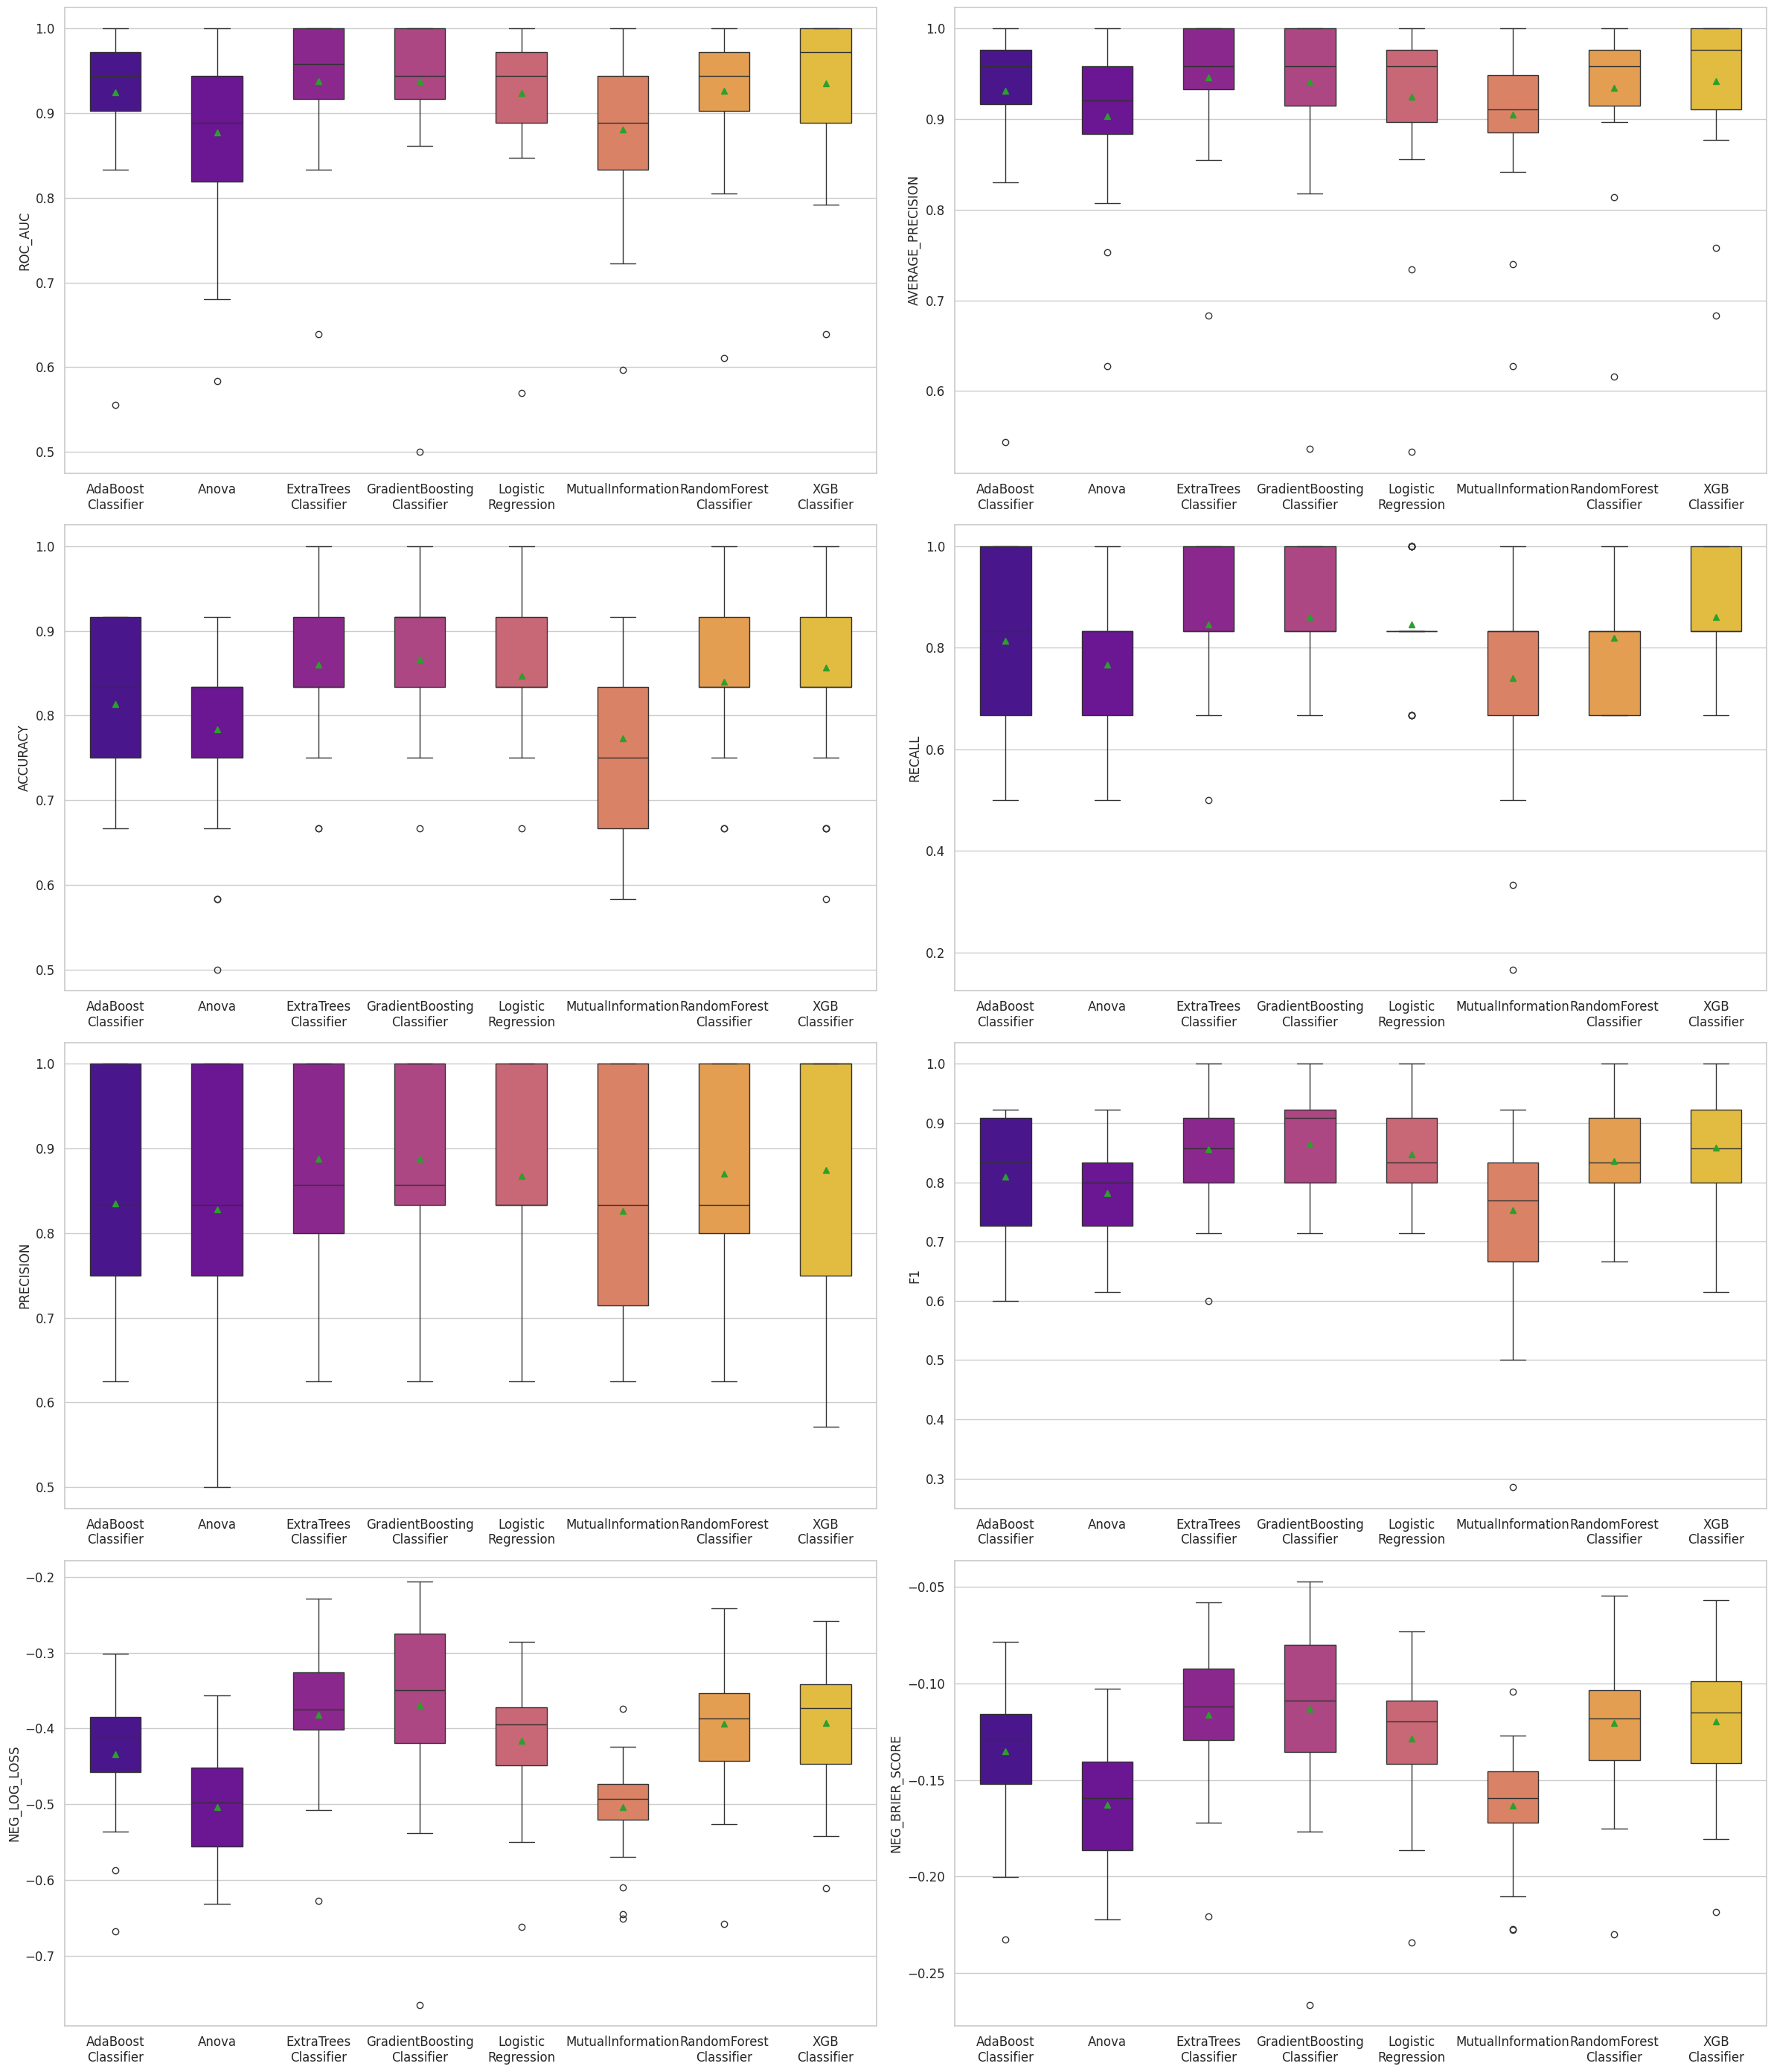

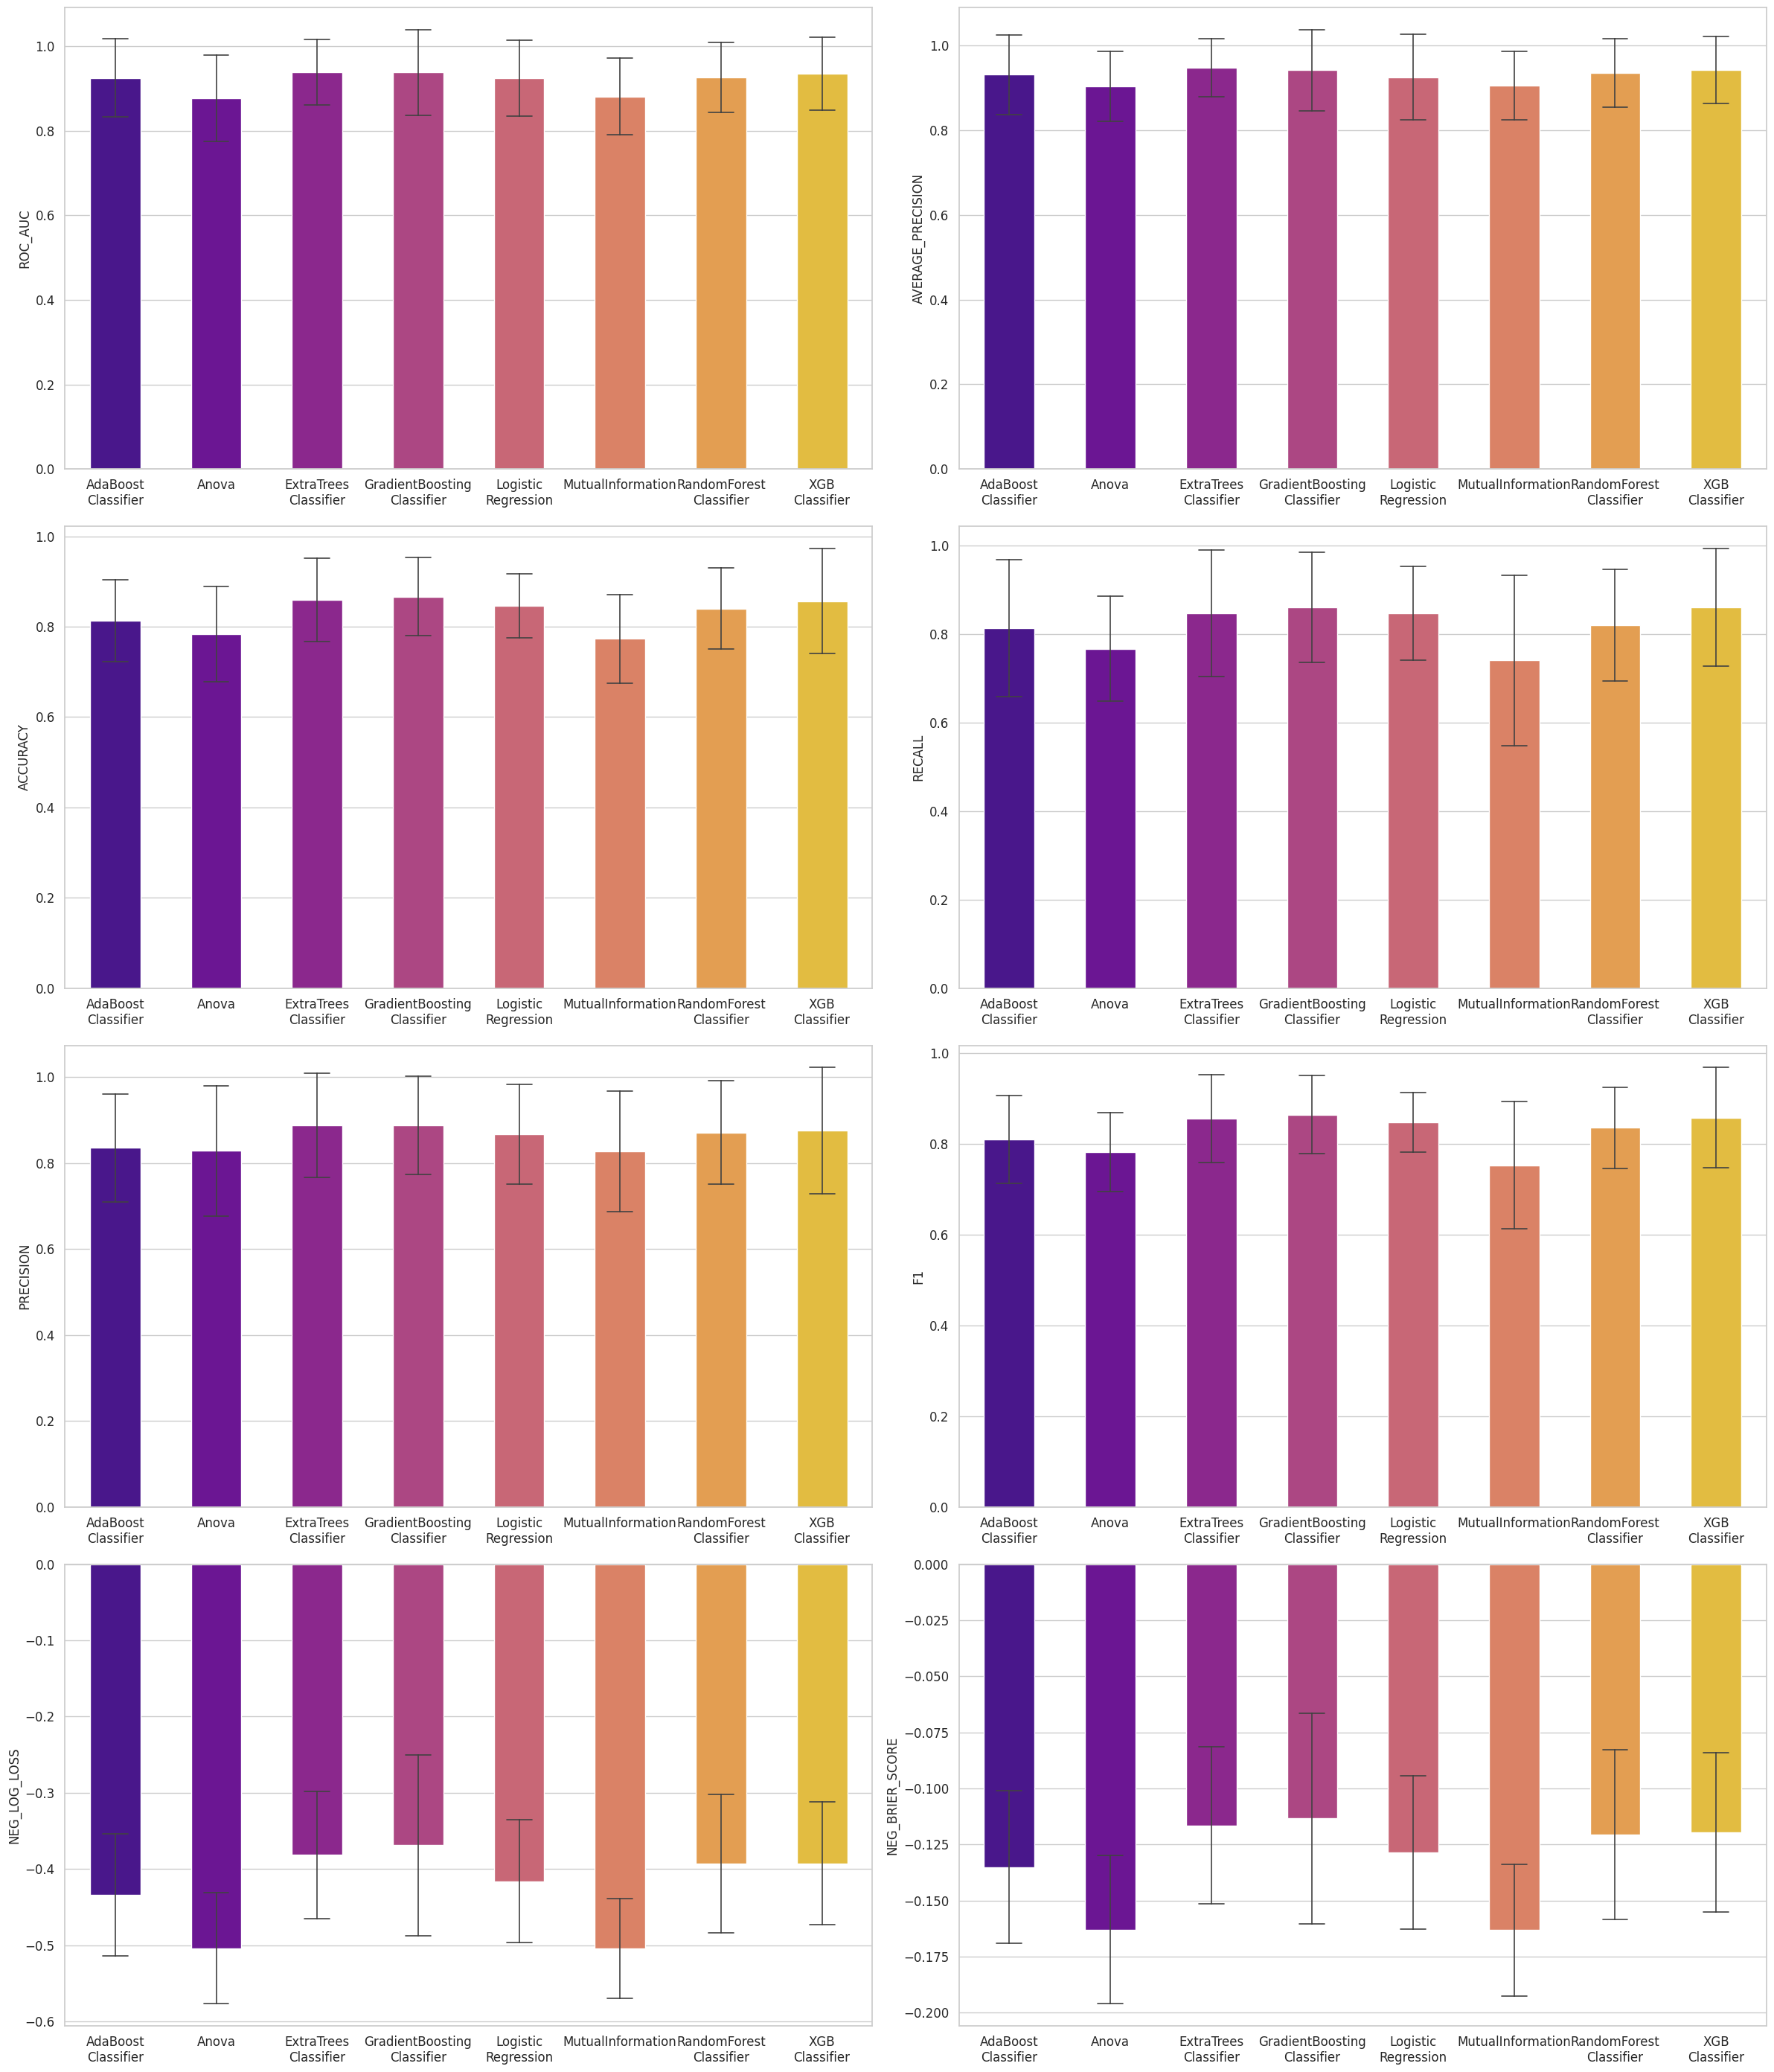

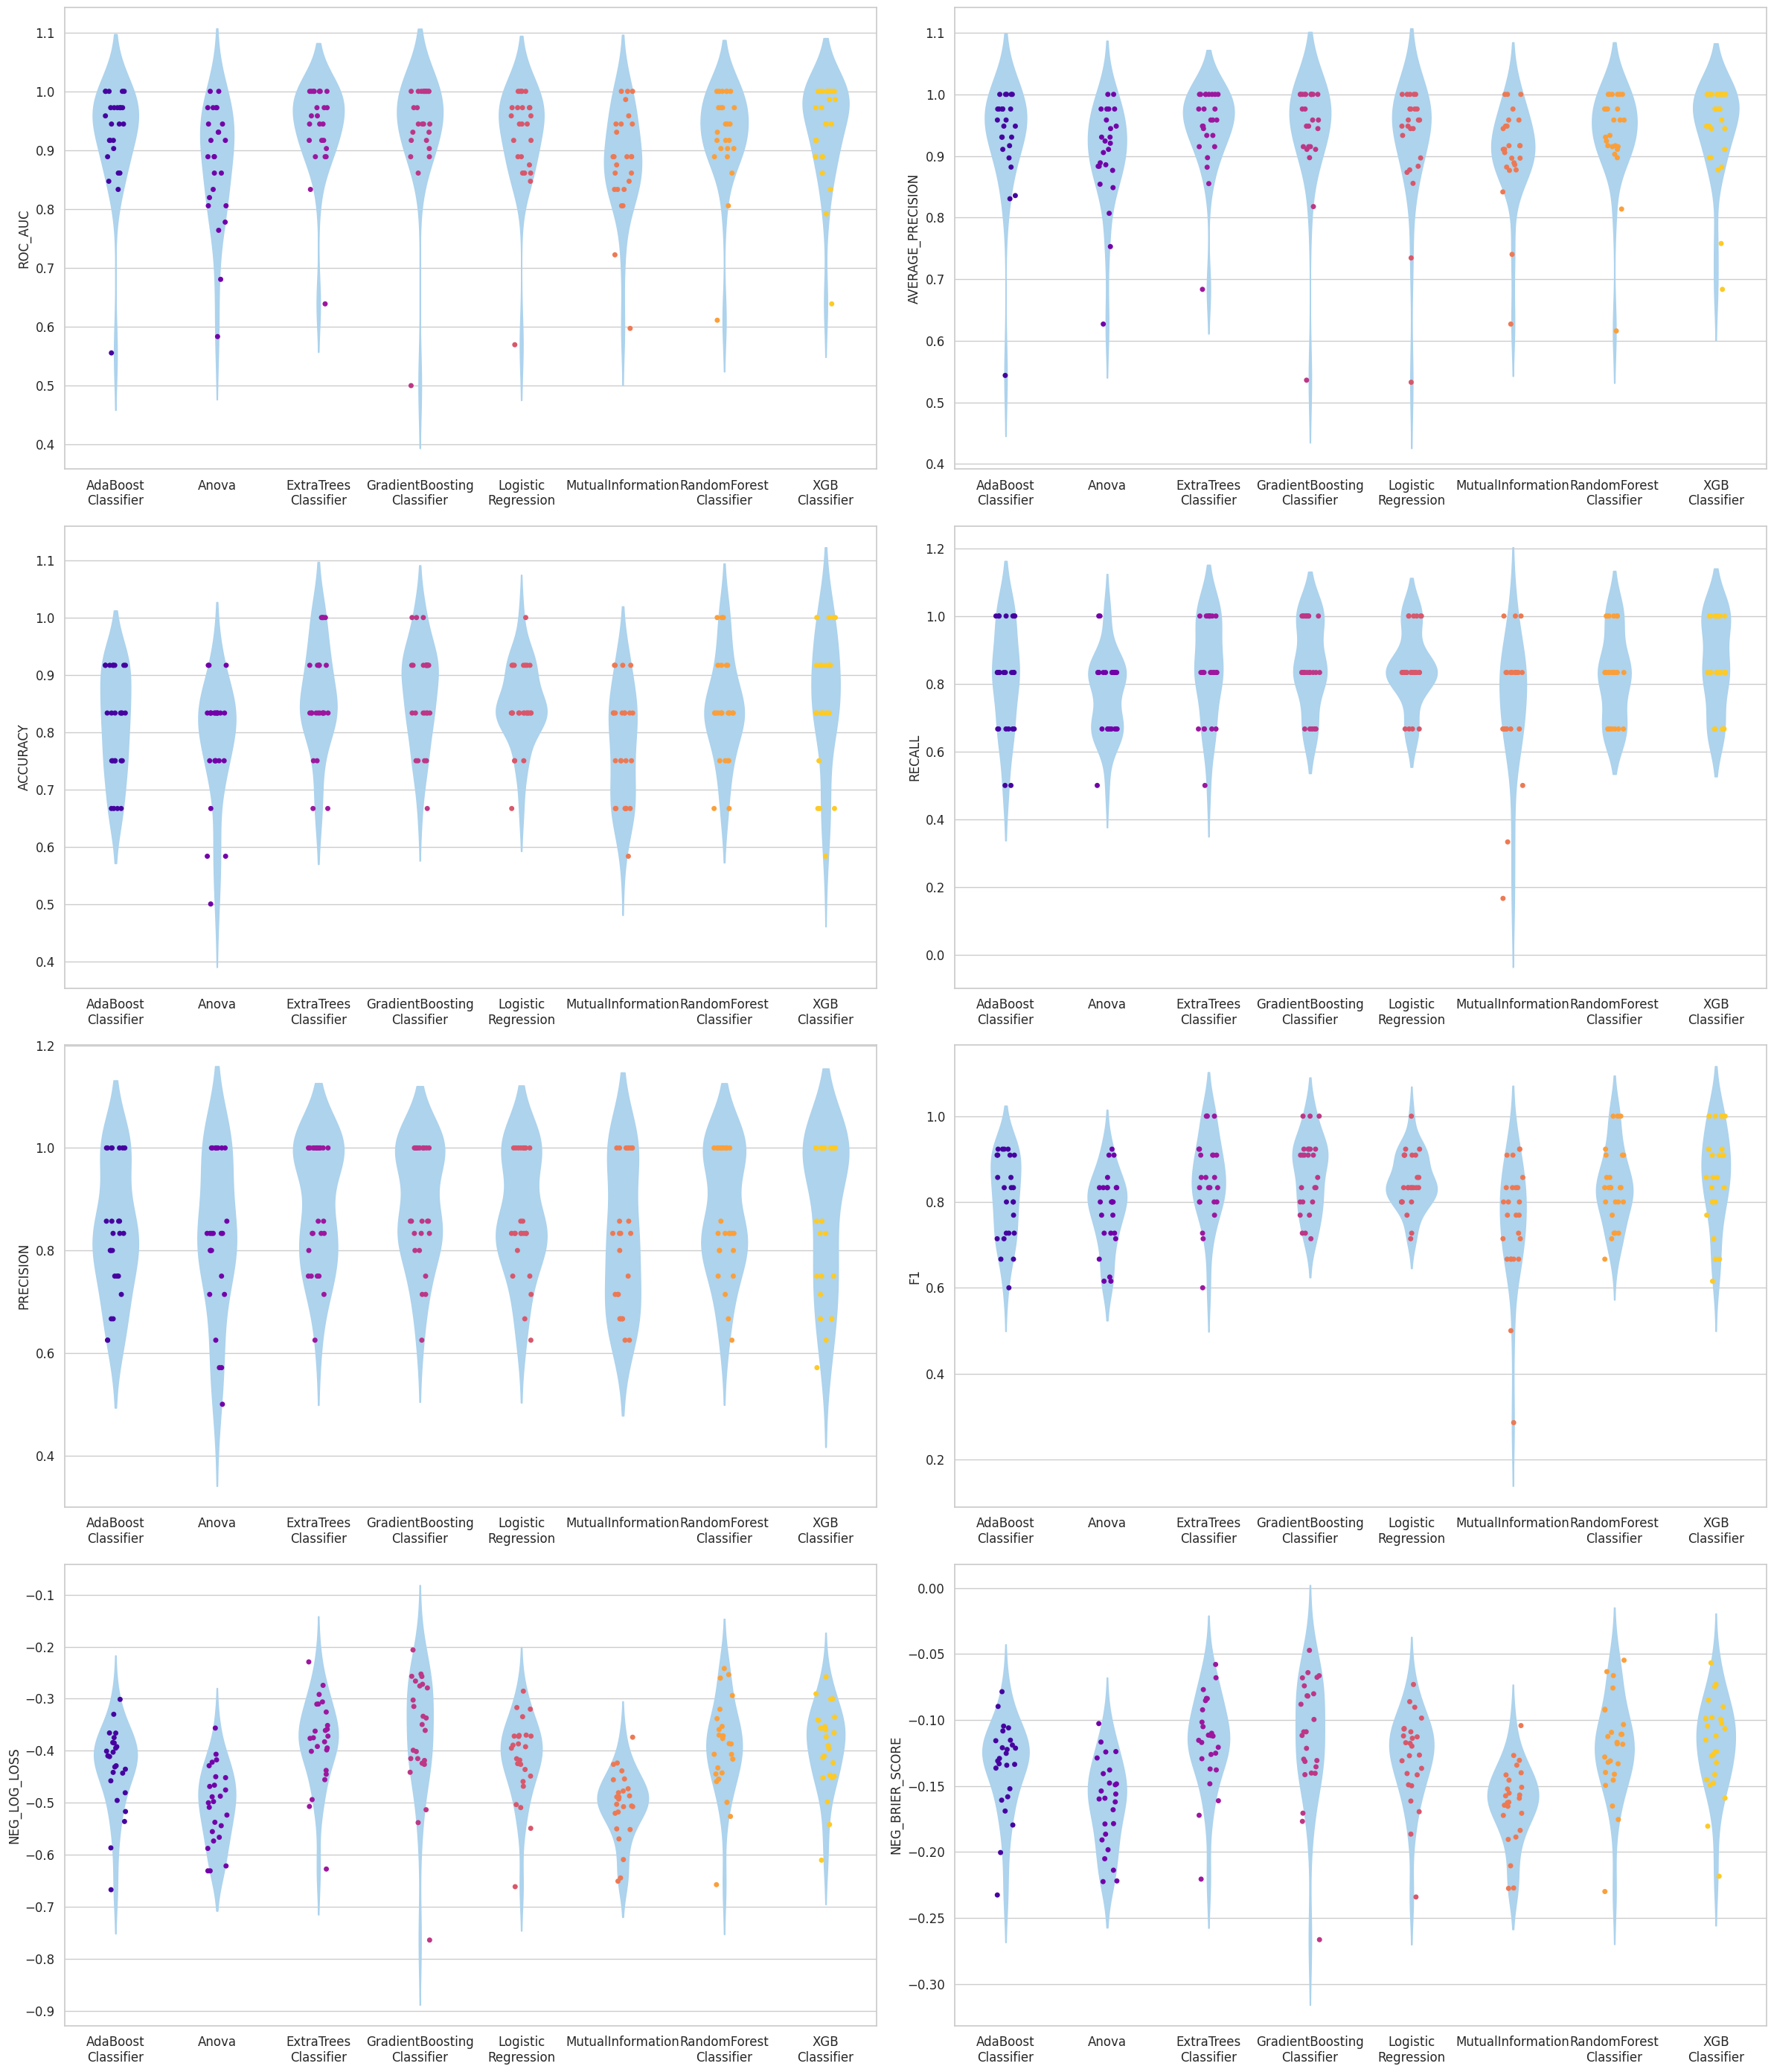

In [1]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation
from ProQSAR.FeatureSelector.feature_selector_utils import evaluate_feature_selectors, _get_method_map
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic classification data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data


scoring_list = [
            "roc_auc",
            "average_precision",
            "accuracy",
            "recall",
            "precision",
            "f1",
            "neg_log_loss",
            "neg_brier_score",
        ]

class_data = create_classification_data()
cv_result = evaluate_feature_selectors(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    visualize=["box","bar","violin"],
    save_csv=True)

from IPython.display import display
display(cv_result)


In [4]:
max_f1_column = cv_result.loc[("f1", "mean")]
print(max_f1_column)

method
AdaBoostClassifier            0.810236
Anova                         0.782216
ExtraTreesClassifier          0.855923
GradientBoostingClassifier    0.865011
LogisticRegression            0.847334
MutualInformation             0.753496
RandomForestClassifier        0.835865
XGBClassifier                 0.858478
Name: (f1, mean), dtype: float64


/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(


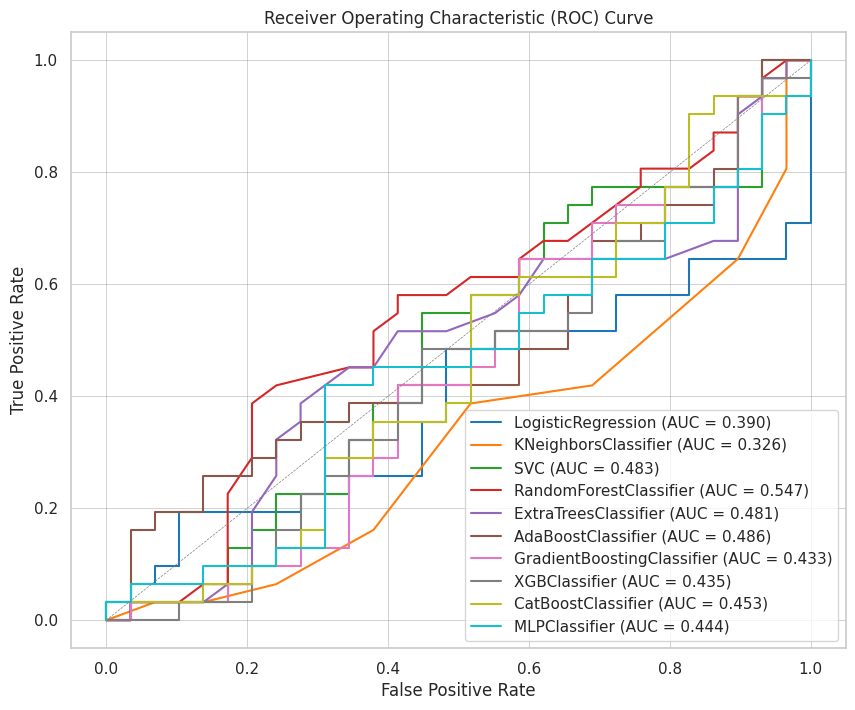

In [5]:
ModelValidation.make_roc_curve(
    data_train=train_data,
    data_test=test_data,
    activity_col="Activity", 
    id_col="ID", 
    #legend_loc="upper right",
    save_dir=None,
)

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(


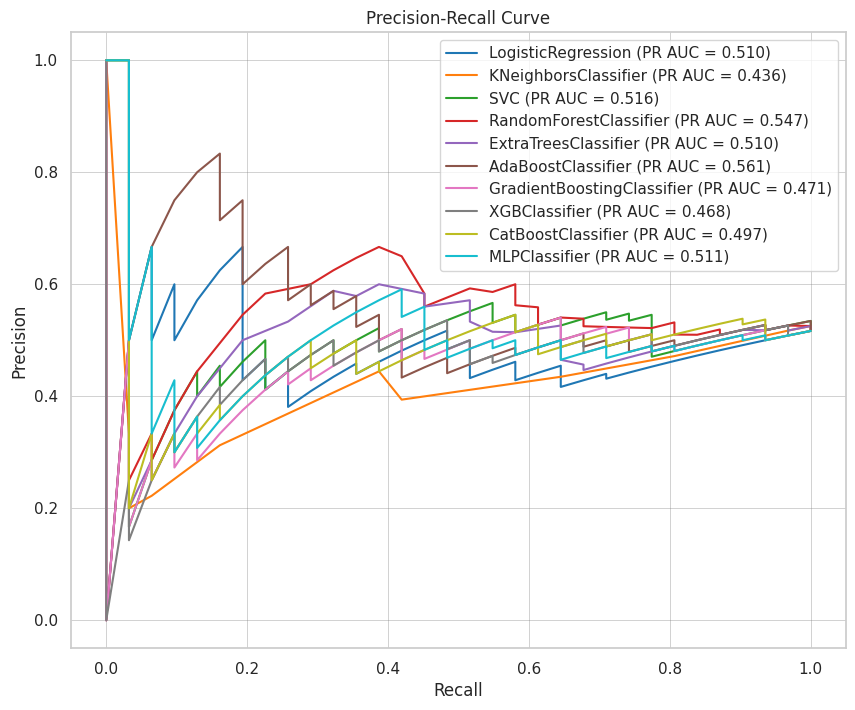

In [7]:
ModelValidation.make_pr_curve(
    data_train=train_data,
    data_test=test_data,
    activity_col="Activity", 
    id_col="ID", 
    legend_loc="upper right",
    save_dir=None,
)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from IPython.display import display
from tempfile import TemporaryDirectory
from sklearn.exceptions import NotFittedError
from sklearn.datasets import make_classification, make_regression
from ProQSAR.FeatureSelector.feature_selector import FeatureSelector

matplotlib.use("Agg")


def create_classification_data(
    n_samples=100, n_features=40, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Create a synthetic classification dataset.

    Parameters:
    ----------
    n_samples : int, optional
        The number of samples to generate, by default 40.
    n_features : int, optional
        The total number of features, by default 40.
    n_informative : int, optional
        The number of informative features, by default 10.
    random_state : int, optional
        Random seed for reproducibility, by default 42.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the generated features and target.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

train_data = create_classification_data(random_state=42)
test_data = create_classification_data(random_state=41, n_samples=20)

train_data.head(5)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,ID,Activity
0,0.335058,2.806130,1.023710,-4.183386,0.679143,0.630944,-0.842348,1.090980,0.249309,0.386809,...,-2.854283,-1.535572,-1.016683,0.622070,0.612469,-0.302045,2.686558,-1.598935,0,1
1,0.693479,1.053214,-1.707358,-1.205187,-2.153343,-0.552871,-1.785876,1.533728,-1.116524,-0.629263,...,-2.320274,0.617006,1.211944,-1.522359,-1.365956,1.097153,0.094977,-0.846306,1,1
2,-0.359769,4.357696,-1.449645,0.332074,0.160018,-4.389741,-1.270406,-0.650024,-0.921860,-1.496529,...,-0.818370,0.260281,0.343788,-1.846188,-0.957151,0.501783,-0.300631,4.089486,2,1
3,1.639965,3.183344,-0.692421,-0.576997,-0.137449,0.290832,-5.684633,-0.037037,-1.406317,-0.611769,...,1.457706,-1.601966,2.170943,-0.742471,-0.843247,0.952875,-2.176121,0.165316,3,0
4,0.346710,2.134698,1.311984,0.020313,-1.111580,-0.929711,-3.516587,0.904018,0.320786,0.224340,...,-0.209573,-0.032281,-0.113128,0.229075,0.123078,-0.035826,1.766613,2.526160,4,1
